## **Load Libs**

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2

## **Get Data**

In [ ]:
with open("erg_peppers_color_standard_model.pkl", "rb") as temp:
    erg_1 = pickle.load(temp)

In [ ]:
with open("erg_peppers_color_large_model.pkl", "rb") as temp:
    erg_2 = pickle.load(temp)

In [ ]:
with open("erg_peppers_color_small_model.pkl", "rb") as temp:
    erg_3 = pickle.load(temp)

In [ ]:
pred_list_short_1 = erg_1['pred_list_short']
loss_list_1 = erg_1['loss_list']
psnr_list_1 = erg_1['psnr_list']
mse_list_1 = erg_1['mse_list']

In [ ]:
pred_list_short_2 = erg_2['pred_list_short']
loss_list_2 = erg_2['loss_list']
psnr_list_2 = erg_2['psnr_list']
mse_list_2 = erg_2['mse_list']

In [ ]:
pred_list_short_3 = erg_3['pred_list_short']
loss_list_3 = erg_3['loss_list']
psnr_list_3 = erg_3['psnr_list']
mse_list_3 = erg_3['mse_list']

In [ ]:
print(np.argmax(psnr_list_1) * 20, max(psnr_list_1))

10380 28.782988711042137


In [ ]:
print(np.argmax(psnr_list_2) * 20, max(psnr_list_2))

4840 28.717342598266452


In [ ]:
print(np.argmax(psnr_list_3) * 20, max(psnr_list_3))

19900 28.480517316402832


## **Plot data**

In [ ]:
#x = np.linspace(0,15000,751)

In [ ]:
x = np.linspace(0,20000,1001)

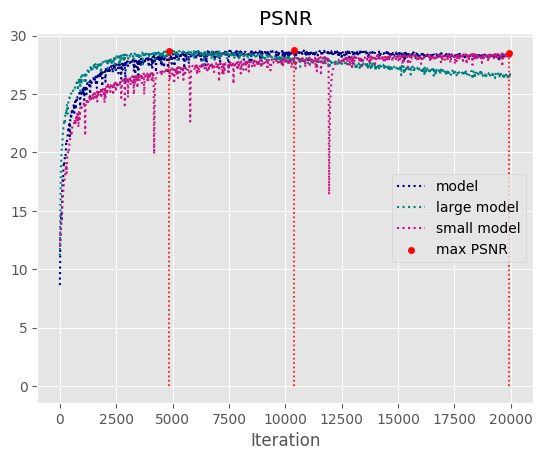

In [ ]:
with plt.style.context('ggplot'):
  plt.plot(x, psnr_list_1, linestyle=':', color='navy', label='model')
  plt.plot(x, psnr_list_2, linestyle=':', color='teal', label='large model')
  plt.plot(x, psnr_list_3, linestyle=':', color='mediumvioletred', label='small model')
  plt.scatter(np.argmax(psnr_list_1) * 20, max(psnr_list_1), s=20, color='red', zorder=10, label='max PSNR')
  plt.scatter(np.argmax(psnr_list_2) * 20, max(psnr_list_2), s=20, color='red', zorder=10)
  plt.scatter(np.argmax(psnr_list_3) * 20, max(psnr_list_3), s=20, color='red', zorder=10)
  plt.title('PSNR')
  plt.xlabel('Iteration')
  plt.grid(True)
  plt.vlines(x=np.argmax(psnr_list_1) * 20, ymin=0, ymax=max(psnr_list_1), linestyles=':', linewidth=1.2, color='red')
  plt.vlines(x=np.argmax(psnr_list_2) * 20, ymin=0, ymax=max(psnr_list_2), linestyles=':', linewidth=1.2, color='red')
  plt.vlines(x=np.argmax(psnr_list_3) * 20, ymin=0, ymax=max(psnr_list_3), linestyles=':', linewidth=1.2, color='red')
  plt.legend(loc='center right')
  plt.savefig('PSNR.png', bbox_inches='tight')

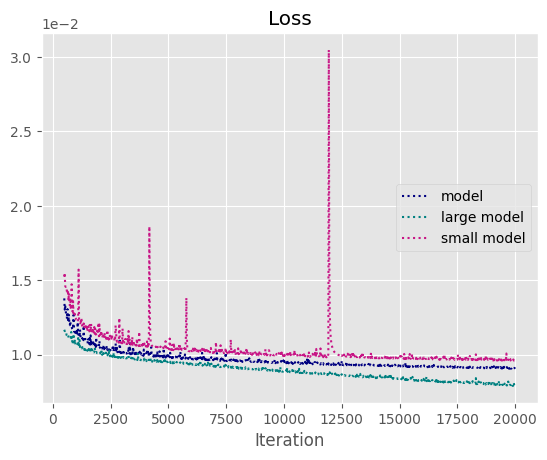

In [ ]:
with plt.style.context('ggplot'):
  plt.plot(x[25:], loss_list_1[25:], linestyle=':', color='navy', label='model')
  plt.plot(x[25:], loss_list_2[25:], linestyle=':', color='teal', label='large model')
  plt.plot(x[25:], loss_list_3[25:], linestyle=':', color='mediumvioletred', label='small model')
  plt.title('Loss')
  plt.xlabel('Iteration')
  plt.grid(True)
  plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
  #plt.scatter(np.argmin(loss_list)* 20, min(loss_list), s=20, color='red', zorder=10, label='min Loss')
  plt.legend(loc='center right')
  plt.savefig('Loss.png', bbox_inches='tight')

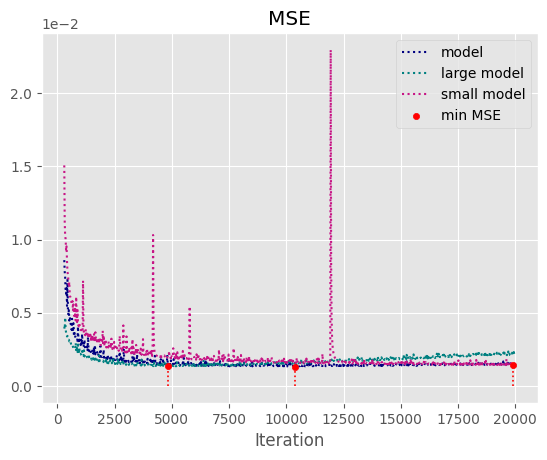

In [ ]:
with plt.style.context('ggplot'):
  plt.plot(x[15:], mse_list_1[15:], linestyle=':', color='navy', label='model')
  plt.plot(x[15:], mse_list_2[15:], linestyle=':', color='teal', label='large model')
  plt.plot(x[15:], mse_list_3[15:], linestyle=':', color='mediumvioletred', label='small model')
  plt.title('MSE')
  plt.xlabel('Iteration')
  plt.grid(True)
  plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
  plt.scatter(np.argmin(mse_list_1)* 20, min(mse_list_1), s=20, color='red', zorder=10, label='min MSE')
  plt.scatter(np.argmin(mse_list_2)* 20, min(mse_list_2), s=20, color='red', zorder=10)
  plt.scatter(np.argmin(mse_list_3)* 20, min(mse_list_3), s=20, color='red', zorder=10)
  plt.vlines(x=np.argmin(mse_list_1) * 20, ymin=0, ymax=min(mse_list_1), linestyles=':', linewidth=1.2, color='red')
  plt.vlines(x=np.argmin(mse_list_2) * 20, ymin=0, ymax=min(mse_list_2), linestyles=':', linewidth=1.2, color='red')
  plt.vlines(x=np.argmin(mse_list_3) * 20, ymin=0, ymax=min(mse_list_3), linestyles=':', linewidth=1.2, color='red')
  plt.legend(loc='upper right')
  plt.savefig('MSE.png', bbox_inches='tight')

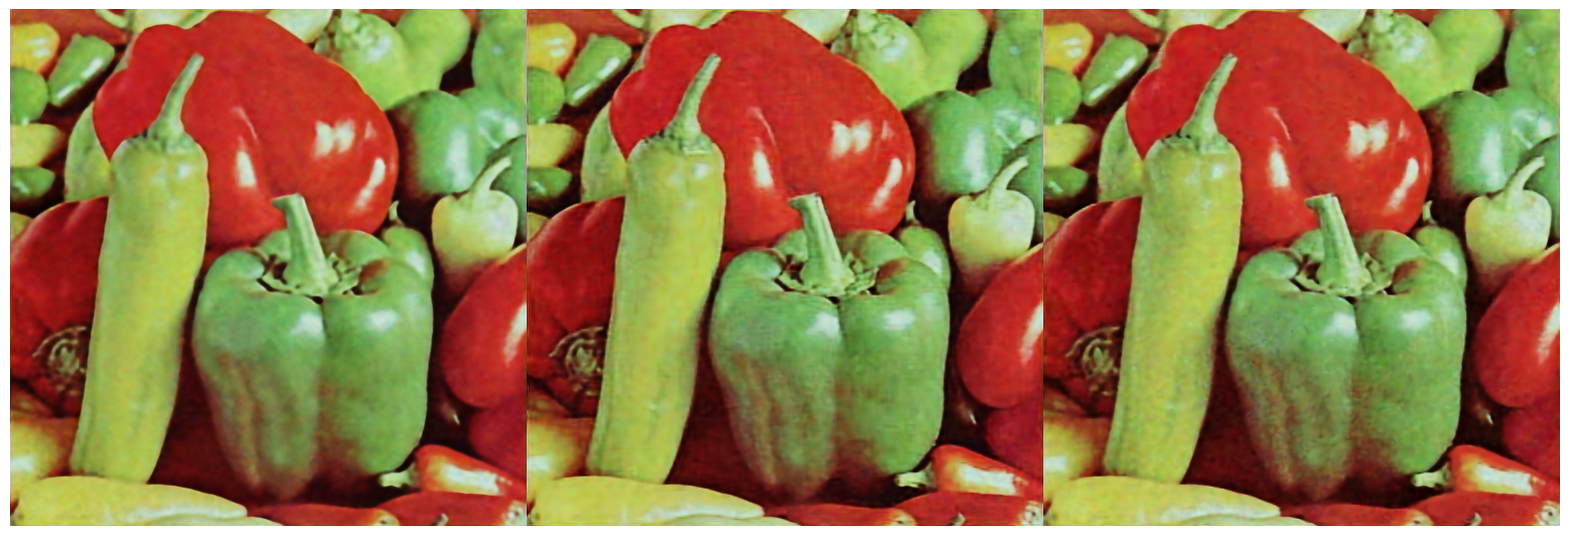

In [ ]:
plot_image = np.concatenate((pred_list_short_2[-2], pred_list_short_1[-2], pred_list_short_3[-2]), axis=1)

plt.figure(figsize=(20, 30), frameon=False)

plt.imshow(plot_image, cmap='gray', interpolation='lanczos')
plt.axis('off')

plt.show()

## **Save Image**

In [ ]:
erg = (plot_image * 255).astype(np.uint8)
cv2.imwrite('XXX.jpg', cv2.cvtColor(erg, cv2.COLOR_RGB2BGR))

True